# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.
Выполнил студент гр. 0382 Ильин Денис. Вариант №34

## Цель работы
Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения
и анализа сетей аффилированности.

## Основные теоретические положения


## Основные теоретические положения

Подгруппы:

* __n-клика__ - подграф , в котором наибольшее геодезическое расстояние между любыми двумя узлами не превышает n.

* __n-клан__ - аналогично n-клике, но учитываются только расстояния внутри подграфа.

* __n-клуб__ - подграф (максимальный), диаметра не больше n.

* __k-ядро__ - подграф (максимальный), в котором каждая вершина связана минимум с _k_ другими вершинами этого же подграфа.

* __k-плекс__ - подграф (максимальный), содержащий $g_s$ узлов, в котором каждый узел смежен с не менее чем $g_s - k$ узлами подграфа.

__Модулярность__ - характеристика структуры сети, показывающая насколько свойственно для сети разделение на сообщества. Вычисляется как доля рёбер, которые попадают в данные группы, от общего числа рёбер в сети, минус ожидаемая доля рёбер, которые попали бы в группы, если бы были распределены случайно. Изменяется в пределах $[-1/2, 1]$.

__Сеть аффилированности__ - сеть, в которой акторы связаны на основе некотрого отношения сотрудничества в рамках какой-то группы или совместного участия в событии.

__Матрица соучастия акторов__:

$X^{\cal{N}} = \{x_{ij}^{\cal{N}} \}$

$x_{ij}^{\cal{N}} = \sum_{k = 1}^{h} a_{ik}a_{jk}$

__Матрица перекрытия событий__:

$X^{\cal{M}} = \{x_{kl}^{\cal{M}} \}$

$x_{kl}^{\cal{M}} = \sum_{i = 1}^{g} a_{ik}a_{jl}$

__Средний размер событий__ - среднее количество акторов в каждом событии.

$\overline {a}_{ij} = \frac{1}{h} \sum_{j = 1}^{h} x_{jj}^{\cal{M}}$

__Степень участия актора__ - количество событий, в которых участвует данный актор:

$a_{i+} = \sum_{j = 1}^{h} a_{ij} = x_{ii}^{\cal{N}}$

__Размер события__ - количество акторов в нём:

$a_{+j} = \sum_{i = 1}^{g} a_{ij} = x_{ii}^{\cal{M}}$|

__Плотность отношения соучастия__: 
$$\Delta_{(\cal{N})} = \frac{1}{g(g-1)} \sum_{i=1}^{g} \sum_{j=1, i \neq j}^{g} x_{ij}^{\cal{N}}$$

__Плотность отношения перекрытия__: 
$$\Delta_{(\cal{M})} = \frac{1}{h(h-1)} \sum_{k=1}^{h} \sum_{l=1, l \neq k}^{h} x_{kl}^{\cal{M}}$$

__Клика уровня $a$ для отношения соучастия__ - подграф, в котором все пары акторов совместно участвуют не менее чем в $a$ событиях.

__Клика уровня $a$ для отношения перекрытия__ - подграф, в котором все пары событий имеют не менее $с$ общих членов.

__Гиперграф__ - обобщение понятия графа, в котором ребра могут соединять не только две вершины (то есть ребра объединяют вершины в некоторые подмножетсва):

$\cal{H = H(A, B)}$, где $\cal{A} = \{a_1, ..., a_n\}$ - множество объектов; $\cal{B} = \{b_1, ..., b_n\}$ - множество ребер.

__Двойственный гипеграф__ для $\cal {H = H(A, B)}$:

$\cal {H* = H(B, A)}$, где $\cal{A} = \{a_1, ..., a_n\}$ - множество ребер; $\cal{B} = \{b_1, ..., b_n\} - множество объектов$

__Отношения шансов__:

* $x_{kl}^{\cal M}$ - число акторов, которые аффилированы с событиями k и l.

* $x_{\overline {kl}}^{\cal M}$ - число акторов, которые не принадлежат ни одному событию.

* $x_{k \overline l}^{\cal M}$ - число акторов, которые аффилированы с событием k, но не с событием l.

* $x_{\overline {k}l}^{\cal M}$ - число акторов, которые аффилированы с событием l, но не с событием k.


## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести
исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [ ]:
install.packages("devtools")
install.packages('network')
install.packages('sna')
install.packages('igraph')
install.packages('incidentally')
install.packages('HyperG')

In [ ]:
devtools::install_github("DougLuke/UserNetR")

In [ ]:
library(UserNetR)
library(network)
library(sna)
library(igraph)
library(incidentally)
library(HyperG)

### 1. Из файла florentine_marital.csv (для чётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Отобразить сеть с помощью одного из алгоритмов укладки.


In [ ]:
marital <- read.csv('/doc/florentine_marital.csv', comment.char = "#")
netmat1 <- data.matrix(marital,  rownames.force = NA)
socio <- as.sociomatrix(netmat1)
rownames(socio) <- colnames(marital)
colnames(socio) <- colnames(marital)
socio

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
Castellani,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
Ginori,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guadagni,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
Lamberteschi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Medici,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
Pazzi,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


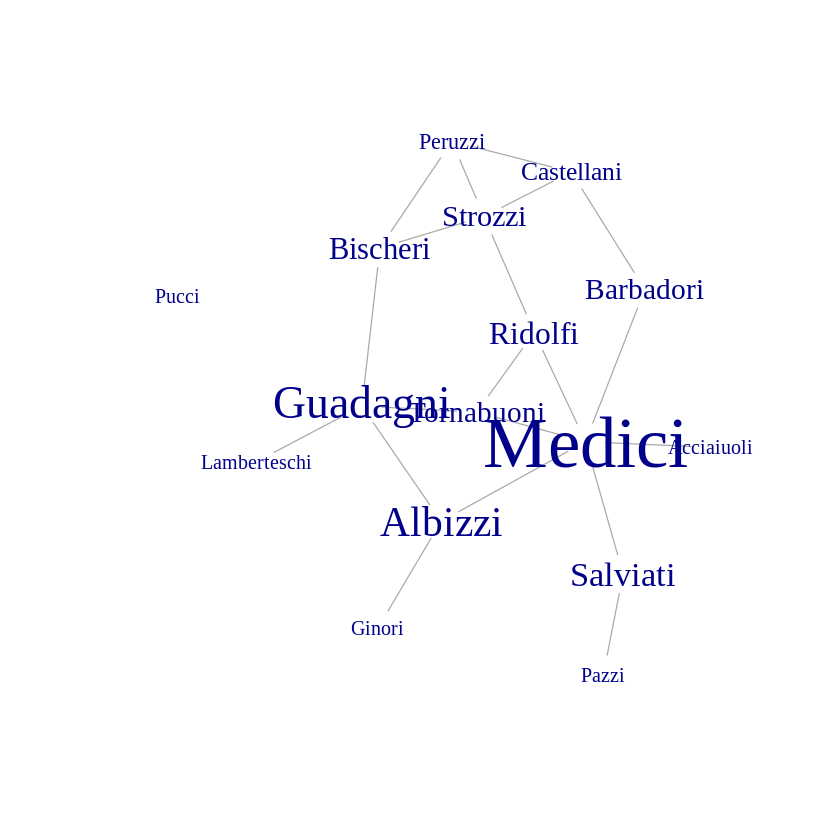

In [ ]:
g <- graph_from_adjacency_matrix(socio, mode="undirected", weighted=TRUE)
lay <- layout_with_fr(g)
cb <- betweenness(g)
plot(g, layout=lay, vertex.label.cex=1+cb/18, vertex.shape="none")

### 2. Исследовать данную сеть на предмет подгрупп с помощью: 

* 𝑛-клик;
* 𝑛-кланов;
* 𝑛-клубов;
* 𝑘-ядер;
* 𝑘-плексов

Указать какие подгруппы плучились. Сделать выводы.

In [ ]:
nclan <- function(g,n,ncliques){
    E(g)$weight <- 1 
    n.cand <- ncliques[[n]] 
    n.clan <- list() 
    n.clan.i <- 1 
    for (n.cand.i in 1:length(n.cand)){ 
        g.n.cand <- induced_subgraph(g,n.cand[[n.cand.i]]) 
        if (diameter(g.n.cand)<=n){ 
          n.clan[[n.clan.i]] <- n.cand[[n.cand.i]] 
          n.clan.i <- n.clan.i+1 
        }
      }
    return(n.clan) 
}
nclans <- function(g){
    g <- as.undirected(g)
    ncliques <- kCliques(ugraph(igraph.to.graphNEL(g))) 
    result <- c()
    for (i in names(nclique)){
        result[[i]] <- nclan(g, i, ncliques)
    }
    return(result)
}


kplexes <- function(g) {
    result <- c()
    for (i in 2:(length(V(g))-6)) {
        for (j in 1:(i-1)) {
            plex <- kplex(g, j, i)
            if(length(plex) > 0) {
                result[[paste(toString(i), toString(j), "plex", sep="_")]] <- plex
            }
        }
    }
    return(result)
}

kplex <- function(g,k,m){
    g.sym <- as.undirected(g)
    k.plex <- list()
    g.sym.degmk <- induced_subgraph(g.sym,igraph::degree(g.sym)>=(m-k))
    if(length(V(g.sym.degmk)) < m) {
        return(k.plex)
    } 
    k.cand <- combn(V(g.sym.degmk)$name,m) 
    k.plex <- list() 
    k.plex.i <- 1 
    for (k.cand.i in 1:dim(k.cand)[2]){ 
        g.k.cand <- induced_subgraph(g.sym.degmk,k.cand[,k.cand.i]) 
        if (min(igraph::degree(g.k.cand))>=(m-k)){
            k.plex[[k.plex.i]] <- k.cand[,k.cand.i] 
            k.plex.i <- k.plex.i+1 
        }
    }
    return(k.plex) 
}


kkernel <- function(g, k) {
    g.sym <- as.undirected(g)
    k.kernel <- list()
    g.sym.degk <- induced_subgraph(g.sym,igraph::degree(g.sym)>=k)
    if(length(V(g.sym.degk)) < k) {
        return(k.kernel)
    } 
    flag <- 0
    for (j in length(V(g.sym.degk)):1){
        if(flag) {
            break
        }
        k.cand <- combn(V(g.sym.degk)$name,j) 
        k.kernel <- list() 
        k.kernel.i <- 1 
        for (k.cand.i in 1:dim(k.cand)[2]){ 
            g.k.cand <- induced_subgraph(g.sym.degk,k.cand[,k.cand.i]) 
            if (min(igraph::degree(g.k.cand))>=k){ 
                k.kernel[[k.kernel.i]] <- k.cand[,k.cand.i] 
                k.kernel.i <- k.kernel.i+1 
                flag <- 1
            }
        }
    }
    return(k.kernel) 
}

kkernels <- function(g) {
    result <- c()
    for (k in 1:length(V(g))) {
        kernel <- kkernel(g, k)
        if(length(kernel) > 0) {
            result[[paste(toString(k), "kernel", sep="_")]] <- kernel
        }
    }
    return(result)
}

In [ ]:
install.packages("RBGL")
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("RBGL")

In [ ]:
library(RBGL)

### n-cliques

5-клики и последующие клики совпадают, т.к. все геодезические расстояния в графе между любыми двумя вершинами $\leq$ 5 (что можно увидеть при сравнении 5-клики и 6-клики)

In [ ]:
cat("n-cliques")
gNEL <- as_graphnel(g)
nclique <- kCliques(gNEL)
nclique

n-cliques

$`1-cliques`
$`1-cliques`[[1]]
[1] "Acciaiuoli" "Medici"    

$`1-cliques`[[2]]
[1] "Albizzi" "Ginori" 

$`1-cliques`[[3]]
[1] "Albizzi"  "Guadagni"

$`1-cliques`[[4]]
[1] "Albizzi" "Medici" 

$`1-cliques`[[5]]
[1] "Barbadori"  "Castellani"

$`1-cliques`[[6]]
[1] "Barbadori" "Medici"   

$`1-cliques`[[7]]
[1] "Bischeri" "Guadagni"

$`1-cliques`[[8]]
[1] "Bischeri" "Peruzzi"  "Strozzi" 

$`1-cliques`[[9]]
[1] "Castellani" "Peruzzi"    "Strozzi"   

$`1-cliques`[[10]]
[1] "Guadagni"     "Lamberteschi"

$`1-cliques`[[11]]
[1] "Guadagni"   "Tornabuoni"

$`1-cliques`[[12]]
[1] "Medici"     "Ridolfi"    "Tornabuoni"

$`1-cliques`[[13]]
[1] "Medici"   "Salviati"

$`1-cliques`[[14]]
[1] "Pazzi"    "Salviati"

$`1-cliques`[[15]]
[1] "Ridolfi" "Strozzi"


$`2-cliques`
$`2-cliques`[[1]]
[1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Medici"     "Ridolfi"   
[6] "Salviati"   "Tornabuoni"

$`2-cliques`[[2]]
[1] "Albizzi"  "Ginori"   "Guadagni" "Medici"  

$`2-cliques`[[3]]
[1] "Albizzi"      "Bischeri"     "Guadagni"     "Lamberteschi" "Tornabuoni"  

$`2-cliques`[[4]]
[1] "Barbadori"  "Castellani" "Medici"     "Ridolfi"    "Strozzi"   

$`2-cliques`[[5]]
[1] "Bischeri"   "Castellani" "Peruzzi"    "Ridolfi"    "Strozzi"   

$`2-cliques`[[6]]
[1] "Barbadori"  "Castellani" "Peruzzi"    "Ridolfi"    "Strozzi"   

$`2-cliques`[[7]]
[1] "Medici"   "Pazzi"    "Salviati"


$`3-cliques`
$`3-cliques`[[1]]
 [1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Castellani" "Guadagni"  
 [6] "Medici"     "Ridolfi"    "Salviati"   "Strozzi"    "Tornabuoni"

$`3-cliques`[[2]]
[1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Ginori"     "Guadagni"  
[6] "Medici"     "Ridolfi"    "Salviati"   "Tornabuoni"

$`3-cliques`[[3]]
[1] "Albizzi"      "Bischeri"     "Ginori"       "Guadagni"     "Lamberteschi"
[6] "Medici"       "Ridolfi"      "Tornabuoni"  

$`3-cliques`[[4]]
 [1] "Albizzi"    "Barbadori"  "Bischeri"   "Castellani" "Guadagni"  
 [6] "Medici"     "Peruzzi"    "Ridolfi"    "Strozzi"    "Tornabuoni"

$`3-cliques`[[5]]
[1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Medici"     "Pazzi"     
[6] "Ridolfi"    "Salviati"   "Tornabuoni"


$`4-cliques`
$`4-cliques`[[1]]
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Peruzzi"     
[11] "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"  

$`4-cliques`[[2]]
 [1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Castellani" "Ginori"    
 [6] "Guadagni"   "Medici"     "Pazzi"      "Ridolfi"    "Salviati"  
[11] "Strozzi"    "Tornabuoni"


$`5-cliques`
$`5-cliques`[[1]]
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"

### n-clan

Каждый элемент списка - n-клан. 5-кланы и последующие кланы совпадают, т.к. все геодезические расстояния в графе между любыми двумя вершинами ≤ 5 (этот вывод можно сделать уже и при вычислении n-клик, ведь n-кланы строятся на их основе)

In [ ]:
cat("n-clans")
ncl <- nclans(g)
ncl

n-clans

$`1-cliques`
$`1-cliques`[[1]]
[1] "Acciaiuoli" "Medici"    

$`1-cliques`[[2]]
[1] "Albizzi" "Ginori" 

$`1-cliques`[[3]]
[1] "Albizzi"  "Guadagni"

$`1-cliques`[[4]]
[1] "Albizzi" "Medici" 

$`1-cliques`[[5]]
[1] "Barbadori"  "Castellani"

$`1-cliques`[[6]]
[1] "Barbadori" "Medici"   

$`1-cliques`[[7]]
[1] "Bischeri" "Guadagni"

$`1-cliques`[[8]]
[1] "Bischeri" "Peruzzi"  "Strozzi" 

$`1-cliques`[[9]]
[1] "Castellani" "Peruzzi"    "Strozzi"   

$`1-cliques`[[10]]
[1] "Guadagni"     "Lamberteschi"

$`1-cliques`[[11]]
[1] "Guadagni"   "Tornabuoni"

$`1-cliques`[[12]]
[1] "Medici"     "Ridolfi"    "Tornabuoni"

$`1-cliques`[[13]]
[1] "Medici"   "Salviati"

$`1-cliques`[[14]]
[1] "Pazzi"    "Salviati"

$`1-cliques`[[15]]
[1] "Ridolfi" "Strozzi"


$`2-cliques`
$`2-cliques`[[1]]
[1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Medici"     "Ridolfi"   
[6] "Salviati"   "Tornabuoni"

$`2-cliques`[[2]]
[1] "Albizzi"  "Ginori"   "Guadagni" "Medici"  

$`2-cliques`[[3]]
[1] "Albizzi"      "Bischeri"     "Guadagni"     "Lamberteschi" "Tornabuoni"  

$`2-cliques`[[4]]
[1] "Barbadori"  "Castellani" "Medici"     "Ridolfi"    "Strozzi"   

$`2-cliques`[[5]]
[1] "Bischeri"   "Castellani" "Peruzzi"    "Ridolfi"    "Strozzi"   

$`2-cliques`[[6]]
[1] "Medici"   "Pazzi"    "Salviati"


$`3-cliques`
$`3-cliques`[[1]]
[1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Ginori"     "Guadagni"  
[6] "Medici"     "Ridolfi"    "Salviati"   "Tornabuoni"

$`3-cliques`[[2]]
[1] "Albizzi"      "Bischeri"     "Ginori"       "Guadagni"     "Lamberteschi"
[6] "Medici"       "Ridolfi"      "Tornabuoni"  

$`3-cliques`[[3]]
 [1] "Albizzi"    "Barbadori"  "Bischeri"   "Castellani" "Guadagni"  
 [6] "Medici"     "Peruzzi"    "Ridolfi"    "Strozzi"    "Tornabuoni"

$`3-cliques`[[4]]
[1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Medici"     "Pazzi"     
[6] "Ridolfi"    "Salviati"   "Tornabuoni"


$`4-cliques`
$`4-cliques`[[1]]
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Peruzzi"     
[11] "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"  

$`4-cliques`[[2]]
 [1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Castellani" "Ginori"    
 [6] "Guadagni"   "Medici"     "Pazzi"      "Ridolfi"    "Salviati"  
[11] "Strozzi"    "Tornabuoni"


$`5-cliques`
$`5-cliques`[[1]]
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"

### n-club нет.

### k-plex нет.

Алгоритм заходит в цикл, потому что их не находит

In [ ]:
nop <- socio[-12, ][,-12]
nopgraph<-graph.adjacency(nop, mode = "undirected")
cat("i_j_plex => i - мощность множества вершин подграфа, j - k")
kpl <- kplexes(nopgraph)
kpl

### k-ядра

Каждый элемент списка - k-ядро (от 1 до 2). Нулевое ядро - вырожденный случай и это всегда весь граф.

In [ ]:
nop <- socio[-12, ][,-12] #without pucci 
nopgraph<-graph.adjacency(nop, mode = "undirected")

cat("k-kernels")
kke <- kkernels(nopgraph)
kke

k-kernels

$`1_kernel`
$`1_kernel`[[1]]
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"  


$`2_kernel`
$`2_kernel`[[1]]
 [1] "Albizzi"    "Barbadori"  "Bischeri"   "Castellani" "Guadagni"  
 [6] "Medici"     "Peruzzi"    "Ridolfi"    "Strozzi"    "Tornabuoni"

### 3. С помощью библиотеки igraph исследовать алгоритмы обноружения сообществ в зависимости от номера варианта: 

  Spinglass, Walktrap, Label propagation

Кратко объяснить суть каждого алгоритма. Вывести значение модулярности и отобразить полученные сообщества. Сделать выводы.

**Spinglass**

Алгоритм Spinglass исходит из статистической физики и основан на модели Поттса с представлением о том, что проблема обнаружения сообщества может быть сопоставлена с поиском основного состояния спинового стекла Поттса с бесконечным диапазоном».По сути, ребра должны соединять узлы, находящиеся в одном и том же спиновом состоянии (т.е. сообществе), в то время как узлы в разных состояниях должны быть отключены, что приводит к «более низкому энергетическому состоянию» или заземлению. Модель создаётся для некоторого количества шагов (например, 25), и спиновые состояния в конце определяют
сообщества. Подобно алгоритму распространения меток, этот алгоритм не является детерминированным.

[1] 0.3975

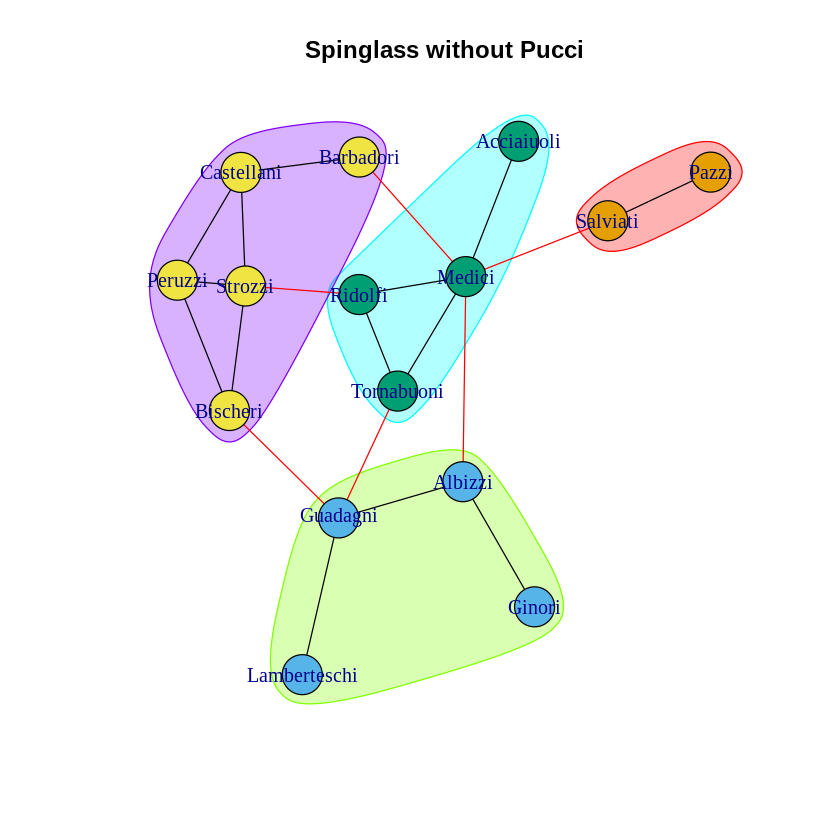

In [ ]:
par(mfrow = c(1,1))
sg <- cluster_spinglass(nopgraph)

plot(sg, nopgraph,  main="Spinglass without Pucci")

sg$modularity

**Walktrap**

Данный алгоритм основан на идее, что случайные блуждания оказываются «пойманы» в той части графа, внутри которого связи плотнее, чем окружающие, то есть там, где находится сообщество. Алгоритм Walktrap начинается с вычисления матрицы перехода, где каждый элемент представляется, как вероятность (на основе силы узла) перехода одного узла к другому. Затем инициализируются случайные блуждания для определенного количества шагов с использованием  матрицы перехода  возможных направлений. 


[1] 0.3975

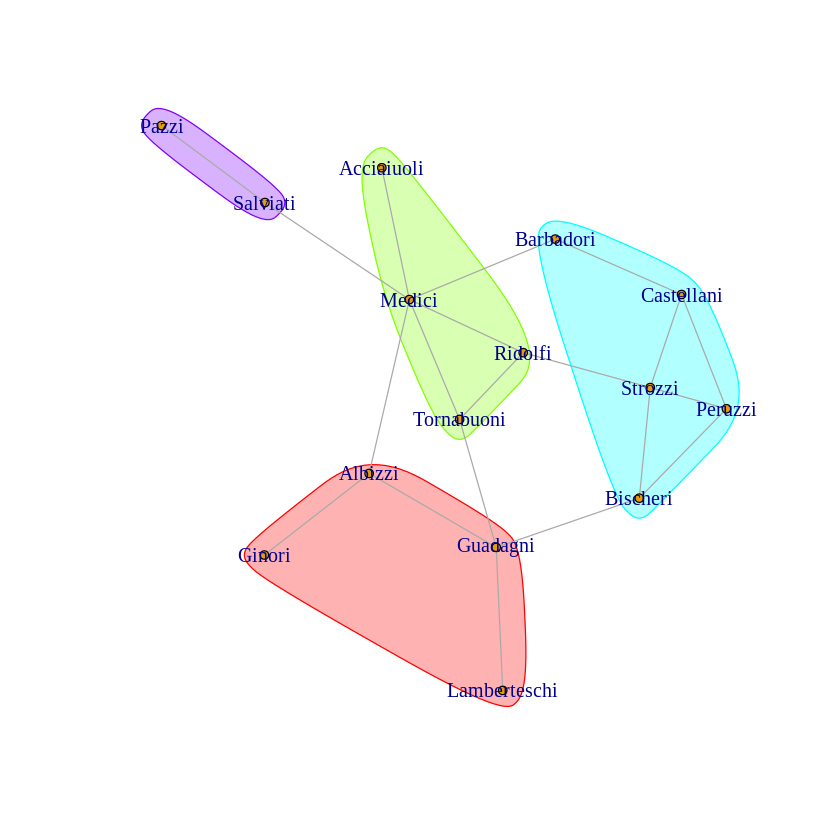

In [ ]:
communityWalk <- walktrap.community(nopgraph)
plot(nopgraph, vertex.size = 3, vertex.label = V(nopgraph)$name, mark.groups = communityWalk)

modularity(communityWalk)

**Label propagation**

Алгоритм "распространения меток" (Label propagation) начинается с присвоения каждому узлу уникальной метки. Затем каждый узел принимает ту же метку, что и большинство его соседей, при этом связи разрываются случайным образом. Этот
продолжается итеративно до тех пор, пока каждый узел не будет иметь ту же метку, что и большинство его соседей. Общее представление заключается в том, что между узлами в сети будет достигнут консенсус. 
Этот алгоритм не является детерминированным. Он дает разные результаты при каждом запуске. 

[1] 0.3975

[1] 0.3975

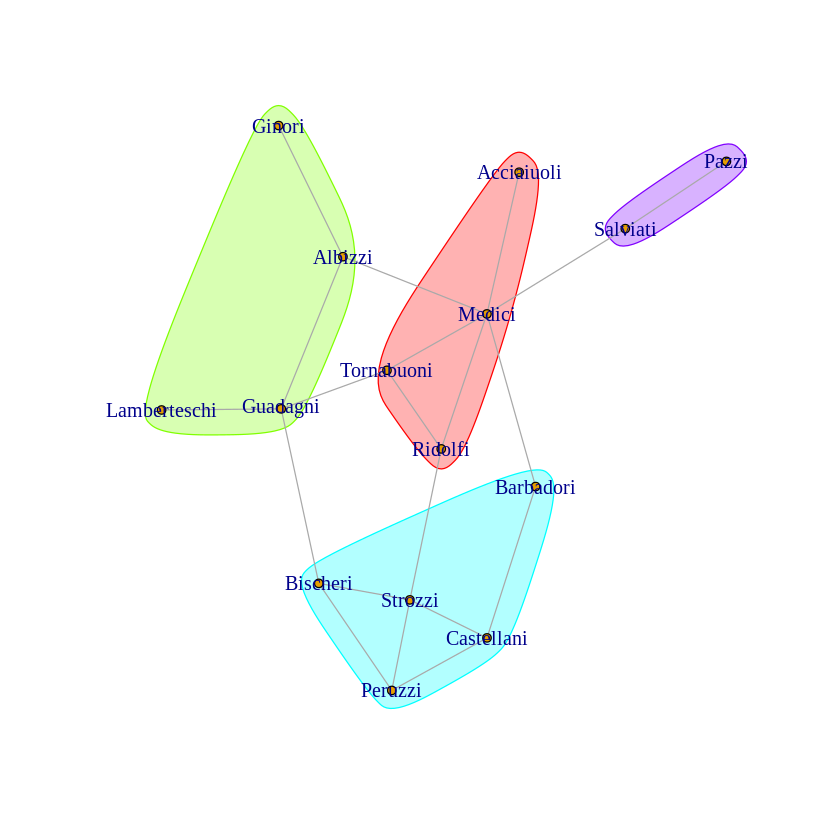

In [ ]:
LP <- label.propagation.community(nopgraph)
plot(nopgraph, vertex.size = 3, vertex.label = V(nopgraph)$name, mark.groups = LP)
LP$modularity
modularity(LP)

### 4. Из файла ceo.csv извлечь матрицу инцидентности с помощью соответствующих функций. Отобразить полученную матрицу.


In [ ]:
ceo <- read.csv('/doc/ceo.csv', header=FALSE, sep=",", skip = 9 )
imax <- data.matrix(ceo)
row.names(imax) <-rownames(ceo)
colnames(imax) <- c(1:15) 
imax

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
6,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
8,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
9,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
10,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


### 5. Отобразить сеть в виде биграфа.

[1] TRUE

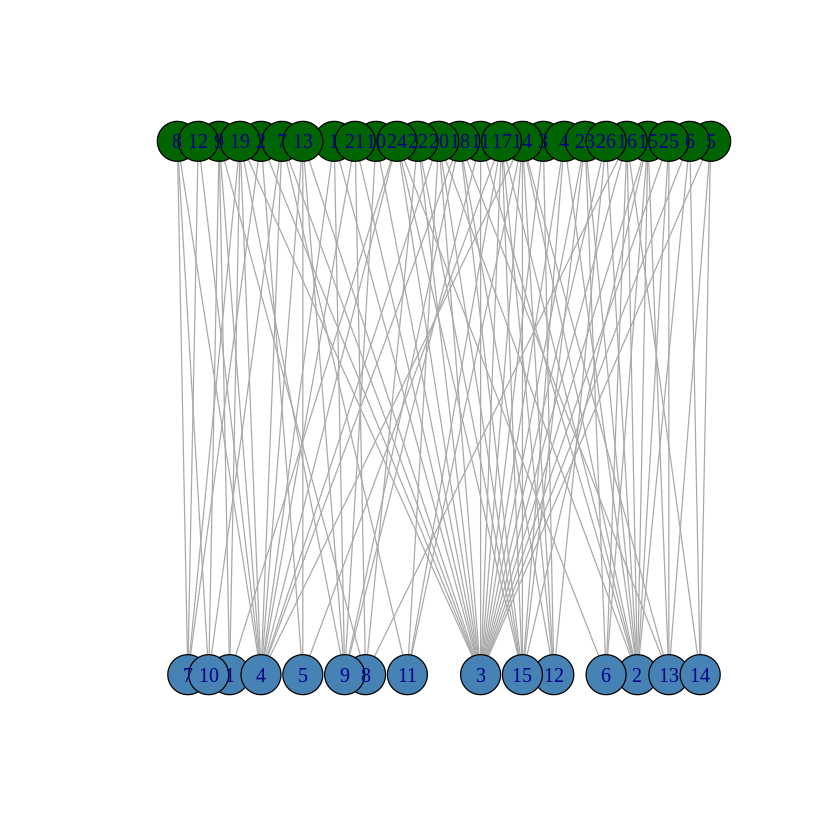

In [ ]:
ceoG <- graph.incidence(imax)
is.bipartite(ceoG)

colours <- c("darkgreen", "steelblue")[V(ceoG)$type + 1]

plot(ceoG, vertex.color=colours,  layout= layout_as_bipartite)

### 6. Отобразить сеть в виде гиперграфа и двойственного гиперграфа (по желанию) 

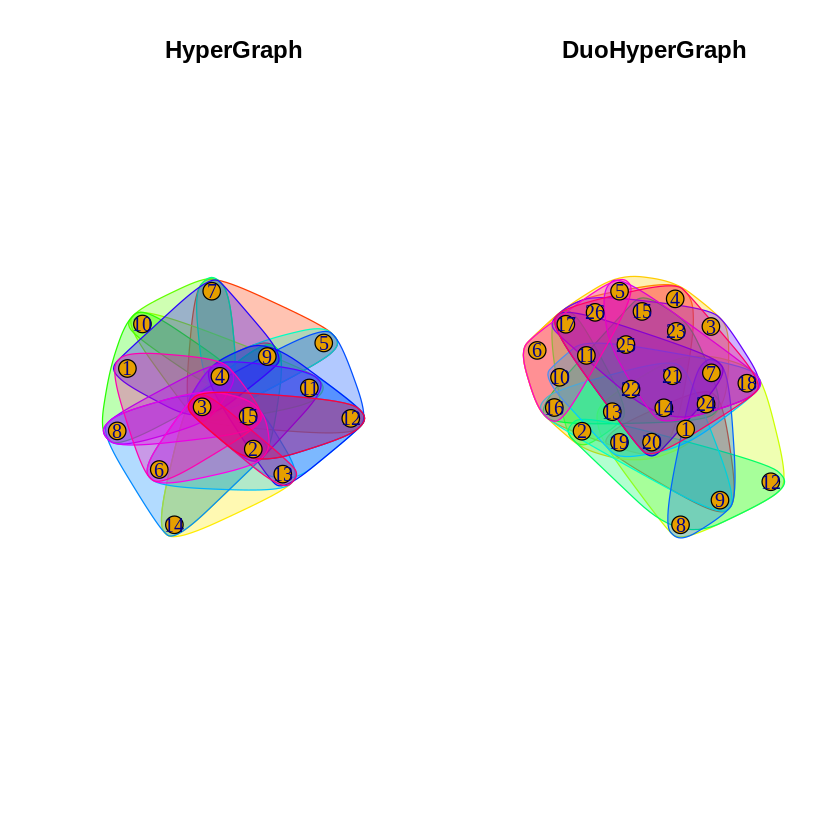

In [ ]:
par(mfrow = c(1,2))

ceoHG <- as.hypergraph(imax)
ceoDuo <- dual_hypergraph(ceoHG)
plot(ceoHG, main = "HyperGraph")
plot(ceoDuo, main = "DuoHyperGraph")

### 7. Представить сеть аффилированности в виде двух одномодальных
сетей: сеть соучастия и сеть перекрытия событий. Представить полученные сети в виде ценностных матриц и взвешенных графов.
Сделать выводы.


,1,2,3,4,5,6,7,8,9,10,⋯,17,18,19,20,21,22,23,24,25,26
1,3,1,1,1,1,1,2,1,1,2,⋯,1,2,3,2,2,1,1,2,1,1
2,1,3,1,1,1,1,1,1,0,1,⋯,2,0,2,1,1,1,1,1,1,1
3,1,1,2,1,1,1,1,0,0,1,⋯,2,1,1,1,1,1,1,1,1,2
4,1,1,1,3,1,2,1,0,0,1,⋯,3,1,1,3,1,2,3,2,2,2
5,1,1,1,1,3,2,1,0,0,1,⋯,1,1,1,1,1,1,1,1,2,1
6,1,1,1,2,2,3,1,0,0,1,⋯,2,0,1,2,1,1,2,1,2,2
7,2,1,1,1,1,1,4,2,2,1,⋯,2,1,2,3,2,1,1,2,1,1
8,1,1,0,0,0,0,2,3,2,0,⋯,0,1,2,1,1,0,0,1,0,0
9,1,0,0,0,0,0,2,2,4,0,⋯,0,1,2,1,2,1,0,2,0,0
10,2,1,1,1,1,1,1,0,0,2,⋯,1,1,2,1,1,1,1,1,1,1


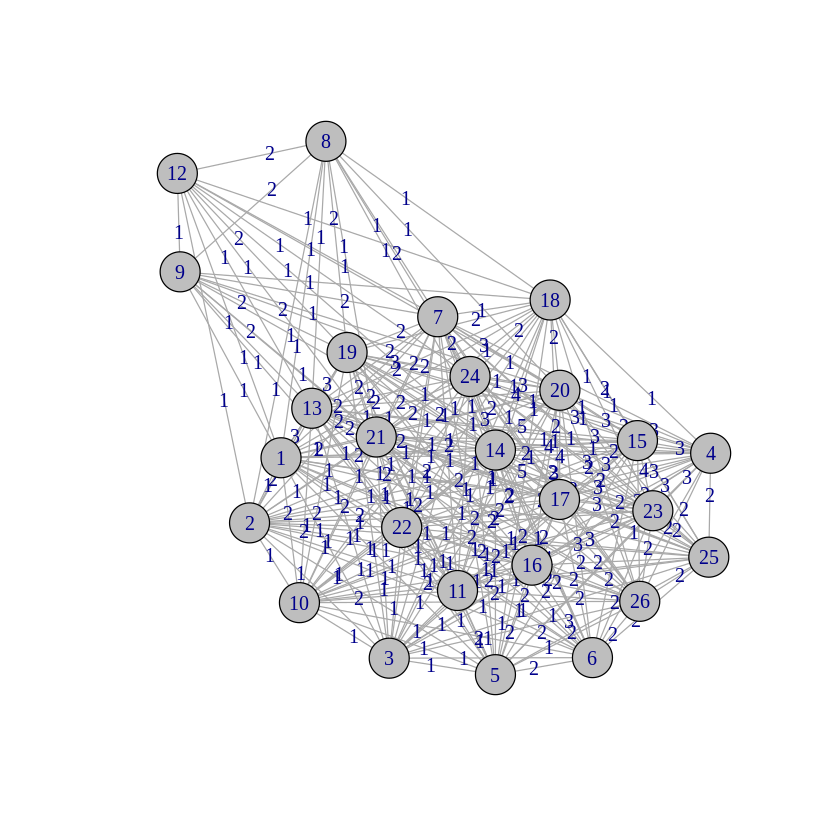

In [ ]:
ceo1Mode <- bipartite.projection(ceoG)
cooper <- ceo1Mode$proj1
event <- ceo1Mode$proj2

plot(cooper, edge.label = E(cooper)$weight, vertex.color = "grey")

coopM <- imax%*%t(imax)
coopM

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,3,0,2,3,0,1,1,1,1,1,0,0,0,0,1
2,0,11,11,2,1,3,0,1,1,0,3,3,3,2,6
3,2,11,22,8,3,4,2,3,5,1,4,4,4,3,8
4,3,2,8,12,1,1,3,2,4,3,3,2,2,0,4
5,0,1,3,1,3,0,1,0,1,0,1,1,0,0,1
6,1,3,4,1,0,4,0,1,0,0,0,0,1,1,3
7,1,0,2,3,1,0,4,0,1,1,0,0,0,0,0
8,1,1,3,2,0,1,0,4,0,1,0,0,0,1,1
9,1,1,5,4,1,0,1,0,6,0,0,1,1,0,1
10,1,0,1,3,0,0,1,1,0,3,1,0,0,0,0


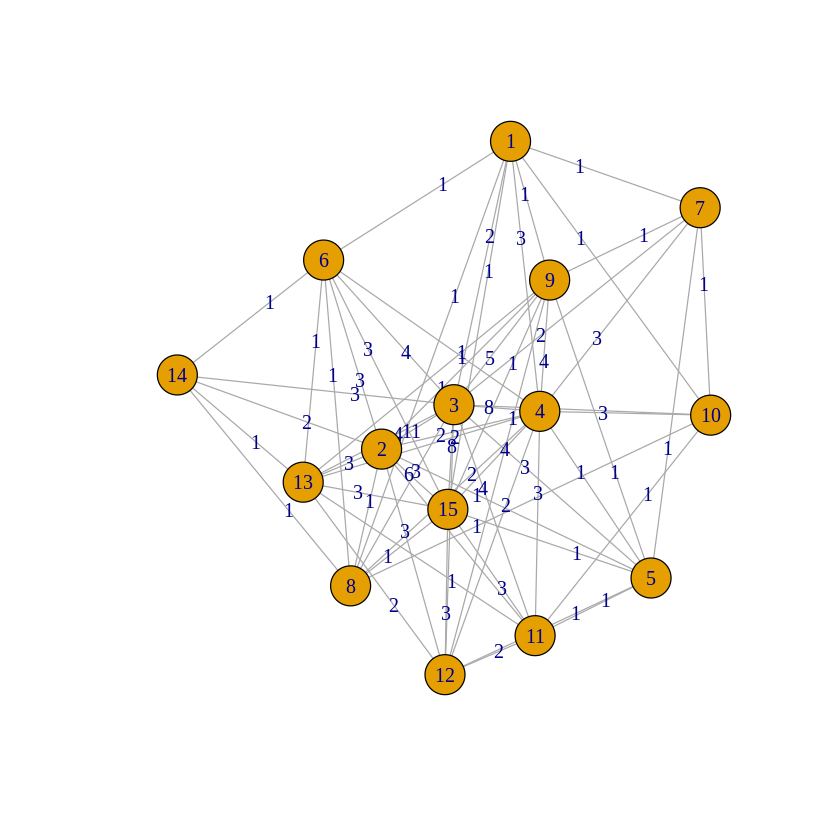

In [ ]:
plot(event, edge.label = E(event)$weight)

eventM<- t(imax)%*%imax
eventM

1.   2 и 3 событие содержат наибольшее число общих участников среди всех пар событий.
2.   Каждый актор состоит в одном событии с большинством других акторов.



### 8. Вычислить степень участия для каждого актора, а также среднее
количество событий, с которыми актор аффилирован. Сделать выводы

In [ ]:
degCoop <- rowSums(imax)
degCoop

gedDiag <- diag(coopM)
gedDiag

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 3  3  2  3  3  3  4  3  4  2  3  2  4  7  5  5  6  5  5  5  3  3  4  5  3  3

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 3  3  2  3  3  3  4  3  4  2  3  2  4  7  5  5  6  5  5  5  3  3  4  5  3  3

In [ ]:
sum(degCoop)/26  

[1] 3.769231

Наиболешая степень у актора 14 (степень 7). В среднем каждый актор участвует в 3-4 событиях.

### 9. Вычислить размер и средний размер для каждого события. Сделать выводы.


In [ ]:
degEven <- diag(eventM) 
degEven

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 
 3 11 22 12  3  4  4  4  6  3  4  5  5  3  9

In [ ]:
sum(degEven)/15 

[1] 6.533333

Самое популярное событие - 3. (Имеет 22 актора). В среднем в каждом событии участвуют 6-7 акторов.

10. Вычислить плотность для соотношения соучастия и отношения перекрытия. Проинтерпретируйте полученные значения.

In [ ]:
sum(coopM)/(26*25)
sum(eventM)/(15*14)

[1] 1.563077

[1] 1.952381

В каждой паре акторов, эта пара участвует в 1-2 общих событиях в среднем, т.к. плотность соотношения соучастия равна 1.56. Аналогично для соотношения  перекрытия, но плотность равна 1.95

### 11. Определить диаметр сети аффилированности

In [ ]:
diameter(ceoG) 
get_diameter(ceoG)

[1] 5

+ 6/41 vertices, named, from 3b9d648:
[1] 8  4  1  3  5  14

### 12. Определить клики уровня 𝑐 = {4, 3} для отношения соучастия и
клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий.
Сделать выводы.

In [ ]:
cat("Kлики уровня 𝑐 = 3 для отношения соучастия:")
NewC <- delete.edges(cooper, E(cooper)[E(cooper)$weight<3])
max_cliques(NewC, min = 3)

cat("Kлики уровня 𝑐 = 4 для отношения соучастия:")
NewC <- delete.edges(cooper, E(cooper)[E(cooper)$weight<4])
max_cliques(NewC, min = 3)

Kлики уровня 𝑐 = 3 для отношения соучастия:

[[1]]
+ 3/26 vertices, named, from 7e0b5c1:
[1] 1  13 19

[[2]]
+ 3/26 vertices, named, from 7e0b5c1:
[1] 7  14 20

[[3]]
+ 3/26 vertices, named, from 7e0b5c1:
[1] 16 15 23

[[4]]
+ 3/26 vertices, named, from 7e0b5c1:
[1] 25 14 15

[[5]]
+ 3/26 vertices, named, from 7e0b5c1:
[1] 26 14 17

[[6]]
+ 5/26 vertices, named, from 7e0b5c1:
[1] 24 14 23 20 15

[[7]]
+ 6/26 vertices, named, from 7e0b5c1:
[1] 14 4  23 20 17 15


Kлики уровня 𝑐 = 4 для отношения соучастия:

[[1]]
+ 3/26 vertices, named, from ff646fe:
[1] 14 17 20


In [ ]:
cat("Kлики уровня 𝑐 = 2 для отношения перекрытия событий:")
NewE <- delete.edges(event, E(event)[E(event)$weight < 2])
max_cliques(NewE, min = 3)

cat("Kлики уровня 𝑐 = 3 для отношения перекрытия событий:")
NewE <- delete.edges(event, E(event)[E(event)$weight < 3])
max_cliques(NewE, min = 3)

cat("Kлики уровня 𝑐 = 4 для отношения перекрытия событий:")
NewE <- delete.edges(event, E(event)[E(event)$weight < 4])
max_cliques(NewE, min = 3)

cat("Kлики уровня 𝑐 = 5 для отношения перекрытия событий:")
NewE <- delete.edges(event, E(event)[E(event)$weight < 5])
max_cliques(NewE, min = 3)

cat("Kлики уровня 𝑐 = 6 для отношения перекрытия событий:")
NewE <- delete.edges(event, E(event)[E(event)$weight < 6])
max_cliques(NewE, min = 3)

Kлики уровня 𝑐 = 2 для отношения перекрытия событий:

[[1]]
+ 3/15 vertices, named, from 793cc3d:
[1] 1 3 4

[[2]]
+ 3/15 vertices, named, from 793cc3d:
[1] 7 3 4

[[3]]
+ 3/15 vertices, named, from 793cc3d:
[1] 8 3 4

[[4]]
+ 3/15 vertices, named, from 793cc3d:
[1] 9 3 4

[[5]]
+ 3/15 vertices, named, from 793cc3d:
[1] 14 2  3 

[[6]]
+ 4/15 vertices, named, from 793cc3d:
[1] 6  2  15 3 

[[7]]
+ 6/15 vertices, named, from 793cc3d:
[1] 15 2  12 4  3  11

[[8]]
+ 6/15 vertices, named, from 793cc3d:
[1] 15 2  12 4  3  13


Kлики уровня 𝑐 = 3 для отношения перекрытия событий:

[[1]]
+ 3/15 vertices, named, from 9a7a1f0:
[1] 9 3 4

[[2]]
+ 4/15 vertices, named, from 9a7a1f0:
[1] 13 2  15 3 

[[3]]
+ 4/15 vertices, named, from 9a7a1f0:
[1] 15 3  2  6 

[[4]]
+ 4/15 vertices, named, from 9a7a1f0:
[1] 15 3  2  11

[[5]]
+ 4/15 vertices, named, from 9a7a1f0:
[1] 15 3  2  12

[[6]]
+ 4/15 vertices, named, from 9a7a1f0:
[1] 15 3  4  11


Kлики уровня 𝑐 = 4 для отношения перекрытия событий:

[[1]]
+ 3/15 vertices, named, from 2719d16:
[1] 2  3  15

[[2]]
+ 3/15 vertices, named, from 2719d16:
[1] 3 4 9

[[3]]
+ 3/15 vertices, named, from 2719d16:
[1] 3  4  15


Kлики уровня 𝑐 = 5 для отношения перекрытия событий:

[[1]]
+ 3/15 vertices, named, from 13ecd77:
[1] 2  3  15


Kлики уровня 𝑐 = 6 для отношения перекрытия событий:

[[1]]
+ 3/15 vertices, named, from efdb56c:
[1] 2  3  15


Были представлены требуемые клики

### 13. Для каждых пар событий определить отношение шансов. Сделать выводы.


In [ ]:
Zero <- 0
Infin <- 0
for(k in 1:14){
    for(l in (k+1):15){
        a <- imax[, c(k, l)]
        res <- sum(colSums(t(a) == c(1, 1)) == ncol(a))*
        sum(colSums(t(a) == c(0, 0)) == ncol(a))/
        sum(colSums(t(a) == c(0, 1)) == ncol(a))/
        sum(colSums(t(a) == c(1, 0)) == ncol(a))   
        cat('Theta(M', k, ', M', l, ') = ', res, '\n', sep="")
        Zero <- Zero + (res!=0)
        Infin <- Infin + (res==Inf)
    }
}
cat('Количество ненулевых значений:', Zero, '\n')
cat('Количество ненулевых значений (%):', Zero/(15*14/2)*100, '\n')
cat('Количество бесконечных значений:', Infin, '\n')
cat('Количество бесконечных значений (%):', Infin/(15*14/2)*100, '\n')

Theta(M1, M2) = 0
Theta(M1, M3) = 0.3
Theta(M1, M4) = Inf
Theta(M1, M5) = 0
Theta(M1, M6) = 3.333333
Theta(M1, M7) = 3.333333
Theta(M1, M8) = 3.333333
Theta(M1, M9) = 1.8
Theta(M1, M10) = 5.25
Theta(M1, M11) = 0
Theta(M1, M12) = 0
Theta(M1, M13) = 0
Theta(M1, M14) = 0
Theta(M1, M15) = 0.9375
Theta(M2, M3) = Inf
Theta(M2, M4) = 0.1111111
Theta(M2, M5) = 0.65
Theta(M2, M6) = 5.25
Theta(M2, M7) = 0
Theta(M2, M8) = 0.4
Theta(M2, M9) = 0.2
Theta(M2, M10) = 0
Theta(M2, M11) = 5.25
Theta(M2, M12) = 2.4375
Theta(M2, M13) = 2.4375
Theta(M2, M14) = 3.111111
Theta(M2, M15) = 4.8
Theta(M3, M4) = 0
Theta(M3, M5) = Inf
Theta(M3, M6) = Inf
Theta(M3, M7) = 0.1
Theta(M3, M8) = 0.4736842
Theta(M3, M9) = 0.8823529
Theta(M3, M10) = 0.04761905
Theta(M3, M11) = Inf
Theta(M3, M12) = 0.6666667
Theta(M3, M13) = 0.6666667
Theta(M3, M14) = Inf
Theta(M3, M15) = 1.714286
Theta(M4, M5) = 0.5454545
Theta(M4, M6) = 0.3333333
Theta(M4, M7) = 4.333333
Theta(M4, M8) = 1.2
Theta(M4, M9) = 3
Theta(M4, M10) = Inf
Theta(M4,

Есть пары акторов, в которых актор связан только с одним событием, либо где актор не связан ни с одним из событий.

## Выводы

Были получены навыки работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.
